In [3]:
import maboss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

ipylab module is not installed, menus and toolbar are disabled.


In [2]:
model_file = "../maboss/models/model_two.bnd"
cfg_file = "../maboss/models/model_two_base.cfg"
model = maboss.load(model_file, cfg_file)

NameError: name 'maboss' is not defined

In [4]:
model_file = "../maboss/models/model_one.bnd"
cfg_file = "../maboss/models/model_one_base.cfg"
m = maboss.load(model_file, cfg_file)

In [5]:
m.mutate("DSP", "OFF")
m.update_parameters(**{f"$DSP_base": 0.0})
res = m.run()

In [23]:
states_df = res.get_states_probtraj()
states_df.head()



,<nil>,DSP,DSP -- JCAD,DSP -- JCAD -- RhoA,DSP -- JCAD -- RhoC,DSP -- JCAD -- RhoC -- RhoA,DSP -- RhoA,DSP -- RhoC,DSP -- RhoC -- RhoA,DSP -- TJP1,DSP -- TJP1 -- JCAD,DSP -- TJP1 -- JCAD -- RhoA,DSP -- TJP1 -- JCAD -- RhoC,DSP -- TJP1 -- JCAD -- RhoC -- RhoA,DSP -- TJP1 -- RhoA,DSP -- TJP1 -- RhoC,DSP -- TJP1 -- RhoC -- RhoA,JCAD,JCAD -- RhoA,JCAD -- RhoC,JCAD -- RhoC -- RhoA,RhoA,RhoC,RhoC -- RhoA,TJP1,TJP1 -- JCAD,TJP1 -- JCAD -- RhoA,TJP1 -- JCAD -- RhoC,TJP1 -- JCAD -- RhoC -- RhoA,TJP1 -- RhoA,TJP1 -- RhoC,TJP1 -- RhoC -- RhoA
0.0,0.057409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060657,0.062532,0.064947,0.057066,0.061726,0.062546,0.054238,0.060086,0.049844,0.056335,0.082095,0.076165,0.064802,0.066226,0.063327
0.1,0.047896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056451,0.064736,0.065662,0.049247,0.058908,0.061584,0.042192,0.054865,0.034696,0.046933,0.114758,0.094893,0.066625,0.077006,0.063548
0.2,0.041803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049101,0.065952,0.067836,0.042911,0.056269,0.056268,0.034563,0.049331,0.026684,0.043100,0.143237,0.106236,0.067073,0.087338,0.062299
0.3,0.036754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043337,0.065158,0.068998,0.037943,0.052078,0.051636,0.029264,0.044882,0.023891,0.043456,0.166760,0.112917,0.065844,0.094538,0.062542
0.4,0.031353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039504,0.066561,0.068290,0.034957,0.047746,0.047535,0.024127,0.041954,0.021006,0.041808,0.185424,0.119404,0.066861,0.100437,0.063032


In [31]:
phenos = []
row = states_df.iloc[0]
failed = hyper = normal = inactive = 0.0;

for col, prob in row.items():
    if col == "<nil>" or prob == 0.0: 
        continue

    nodes_on = set(col.split(" -- "))
    #print(f"nodes on: {nodes_on}, type: {type(nodes_on)}")

    A = "RhoA" in nodes_on
    C = "RhoC" in nodes_on

    if A and not C:
        failed += prob
    elif C and not A:
        hyper += prob
    elif A and C:
        normal += prob
    else:
        inactive += prob

phenos.append({
    "Failed": failed,
    "Hyper": hyper,
    "Normal": normal,
    "Inactive": inactive
})
 
phenos

[{'Failed': 0.245395,
  'Hyper': 0.275814,
  'Normal': 0.250796,
  'Inactive': 0.170587}]

In [33]:
phenos = []
 
for t, row in states_df.iterrows():
    failed = hyper = normal = inactive = 0.0;

    for col, prob in row.items():
        if col == "<nil>" or prob == 0.0: 
            continue

        nodes_on = set(col.split(" -- "))
        A = "RhoA" in nodes_on
        C = "RhoC" in nodes_on

        if A and not C:
            failed += prob
        elif C and not A:
            hyper += prob
        elif A and C:
            normal += prob
        else:
            inactive += prob

    phenos.append({
        "Failed": failed,
        "Hyper": hyper,
        "Normal": normal,
        "Inactive": inactive
    })


phenotype_df = pd.DataFrame(phenos, index=states_df.index)

<Axes: >

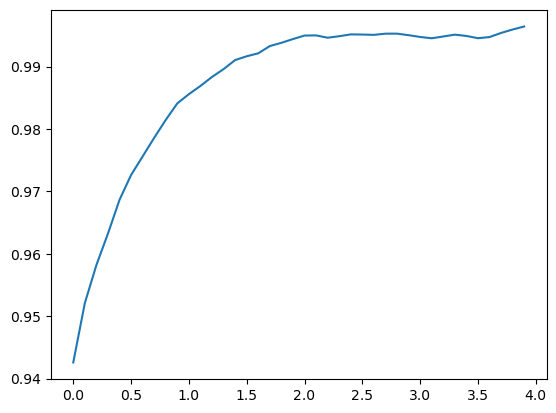

In [35]:
phenotype_df.sum(axis=1).plot()